# Time series

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
import pandas as pd


dataset = pd.read_csv('./dji/dow_jones_index.data')

In [2]:
print(dataset.head())

   quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1              239655616          $16.19           $15

In [3]:
observations = {}

for el in dataset[['stock', 'close']].iterrows():
    
    stock = el[1].stock
    close = float(el[1].close.replace("$", ""))
    
    try:
        observations[stock].append(close)
    except KeyError:
        observations[stock] = [close]


In [4]:
X = []
stock_names = sorted(observations.keys())

for stock in stock_names:
    X.append(observations[stock])

X = np.array(X)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

X_train = X[:, :12]
y_train = X[:, 12]

regr_1 = LinearRegression()
regr_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [6]:
plot_vals = []

for offset in range(0, X.shape[1]-X_train.shape[1]):
    X_test = X[:, offset:12+offset]
    y_test = X[:, 12+offset]
    
    r2 = r2_score(y_test, regr_1.predict(X_test))
    mae = mean_absolute_error(y_test, regr_1.predict(X_test))
    
    print("offset=", offset, "r2_score=", r2)
    print("offset=", offset, "MAE     =", mae)
    
    plot_vals.append( (offset, r2, mae) )

print()
print("r2_score: mean=", np.mean([x[1] for x in plot_vals]), "variance=", np.var([x[1] for x in plot_vals]))
print("mae_score: mean=", np.mean([x[2] for x in plot_vals]), "variance=", np.var([x[2] for x in plot_vals]))

offset= 0 r2_score= 0.999813479679
offset= 0 MAE     = 0.384145971072
offset= 1 r2_score= 0.99504246854
offset= 1 MAE     = 1.602203752
offset= 2 r2_score= 0.995188278161
offset= 2 MAE     = 1.76248455475
offset= 3 r2_score= 0.998287091734
offset= 3 MAE     = 1.15856848271
offset= 4 r2_score= 0.997938802118
offset= 4 MAE     = 1.11955148717
offset= 5 r2_score= 0.985036566148
offset= 5 MAE     = 2.94239117688
offset= 6 r2_score= 0.991598279578
offset= 6 MAE     = 2.35632383083
offset= 7 r2_score= 0.995485519307
offset= 7 MAE     = 1.73191962456
offset= 8 r2_score= 0.992872581249
offset= 8 MAE     = 1.9828644662
offset= 9 r2_score= 0.990012202362
offset= 9 MAE     = 2.66825249081
offset= 10 r2_score= 0.996984329367
offset= 10 MAE     = 1.38682132207
offset= 11 r2_score= 0.999029861989
offset= 11 MAE     = 0.761720947323
offset= 12 r2_score= 0.996280599178
offset= 12 MAE     = 1.53124828142

r2_score: mean= 0.99489000457 variance= 1.5753065199e-05
mae_score: mean= 1.64526895291 variance= 

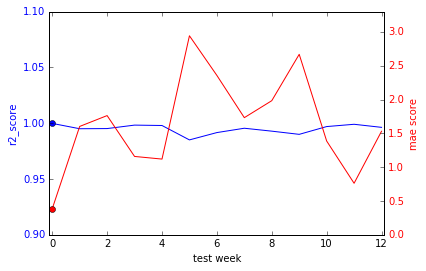

In [7]:
fig, ax1 = plt.subplots()
ax1.plot([x[0] for x in plot_vals], [x[1] for x in plot_vals], 'b-')
ax1.plot(plot_vals[0][0], plot_vals[0][1], 'bo')

ax1.set_xlabel('test week')
ax1.set_ylabel('r2_score', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax1.set_ylim([0.9, 1.1])


ax2 = ax1.twinx()
ax2.plot([x[0] for x in plot_vals], [x[2] for x in plot_vals], 'r-')
ax2.plot(plot_vals[0][0], plot_vals[0][2], 'ro')
ax2.set_ylabel('mae score', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.set_ylim([0, 3.3])

plt.xlim([-.1, 12.1])

plt.show()

In [8]:
training_len = 5

X_train_short = X[:, :training_len]
y_train_short = X[:, training_len]


for offset in range(1, 12-training_len):
    X_train_short = np.vstack( (X_train_short, X[:, offset:training_len+offset]) )
    y_train_short = np.concatenate( (y_train_short, X[:, training_len+offset]) )


In [9]:
regr_2 = LinearRegression()
regr_2.fit(X_train_short, y_train_short)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [10]:
plot_vals = []

for offset in range(0, X.shape[1]-X_train.shape[1]):
    X_test = X[:, 12-training_len+offset:12+offset]
    y_test = X[:, 12+offset]
    
    r2 = r2_score(y_test, regr_2.predict(X_test))
    mae = mean_absolute_error(y_test, regr_2.predict(X_test))
    
    print("offset=", offset, "r2_score=", r2)
    print("offset=", offset, "MAE     =", mae)
    
    plot_vals.append( (offset, r2, mae) )

print()
print("r2_score: mean=", np.mean([x[1] for x in plot_vals]), "variance=", np.var([x[1] for x in plot_vals]))
print("mae_score: mean=", np.mean([x[2] for x in plot_vals]), "variance=", np.var([x[2] for x in plot_vals]))

offset= 0 r2_score= 0.998579501272
offset= 0 MAE     = 0.85687189133
offset= 1 r2_score= 0.999412004606
offset= 1 MAE     = 0.552138850961
offset= 2 r2_score= 0.998668959234
offset= 2 MAE     = 0.941052814674
offset= 3 r2_score= 0.998291291965
offset= 3 MAE     = 1.03476245234
offset= 4 r2_score= 0.997006831124
offset= 4 MAE     = 1.45857426198
offset= 5 r2_score= 0.996849578723
offset= 5 MAE     = 1.04394939395
offset= 6 r2_score= 0.998134003499
offset= 6 MAE     = 1.05938998285
offset= 7 r2_score= 0.998391605331
offset= 7 MAE     = 0.865007491822
offset= 8 r2_score= 0.999317752361
offset= 8 MAE     = 0.607975744054
offset= 9 r2_score= 0.996058731277
offset= 9 MAE     = 1.62548930127
offset= 10 r2_score= 0.997319345983
offset= 10 MAE     = 1.2305378204
offset= 11 r2_score= 0.999264102166
offset= 11 MAE     = 0.649407612032
offset= 12 r2_score= 0.998227164258
offset= 12 MAE     = 1.020568135

r2_score: mean= 0.998116990138 variance= 9.8330905525e-07
mae_score: mean= 0.995825057897 vari

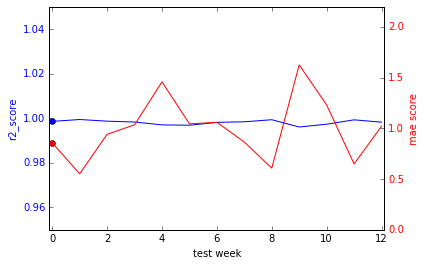

In [11]:
fig, ax1 = plt.subplots()
ax1.plot([x[0] for x in plot_vals], [x[1] for x in plot_vals], 'b-')
ax1.plot(plot_vals[0][0], plot_vals[0][1], 'bo')

ax1.set_xlabel('test week')
ax1.set_ylabel('r2_score', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax1.set_ylim([0.95, 1.05])


ax2 = ax1.twinx()
ax2.plot([x[0] for x in plot_vals], [x[2] for x in plot_vals], 'r-')
ax2.plot(plot_vals[0][0], plot_vals[0][2], 'ro')
ax2.set_ylabel('mae score', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.set_ylim([0, 2.2])

plt.xlim([-.1, 12.1])

plt.show()

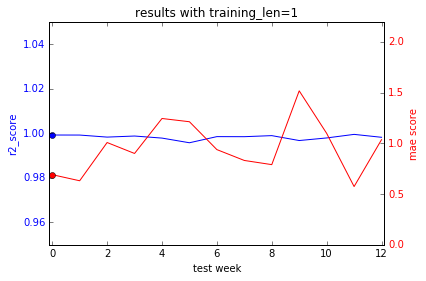

r2_score: mean= 0.998224065712 variance= 1.00685934679e-06
mae_score: mean= 0.95962574798 variance= 0.0663013566722


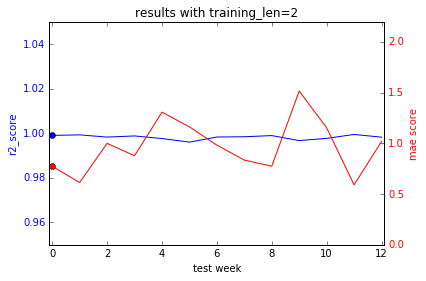

r2_score: mean= 0.998198628321 variance= 9.17757825917e-07
mae_score: mean= 0.969741651259 variance= 0.0661101843822


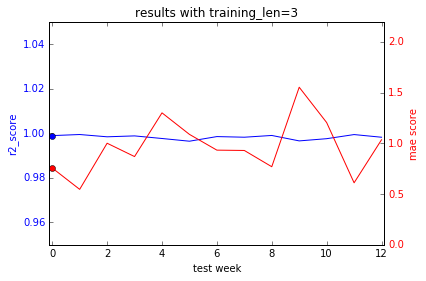

r2_score: mean= 0.998223327997 variance= 8.57207677825e-07
mae_score: mean= 0.969261583196 variance= 0.0715715354908


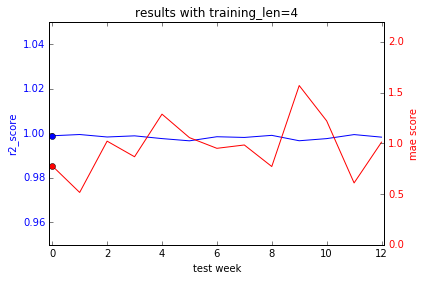

r2_score: mean= 0.998223602314 variance= 7.91949263056e-07
mae_score: mean= 0.972853132744 variance= 0.0737436496017


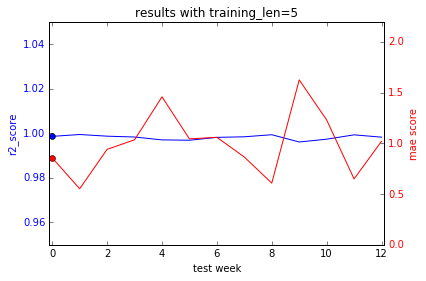

r2_score: mean= 0.998116990138 variance= 9.8330905525e-07
mae_score: mean= 0.995825057897 variance= 0.0908384278533


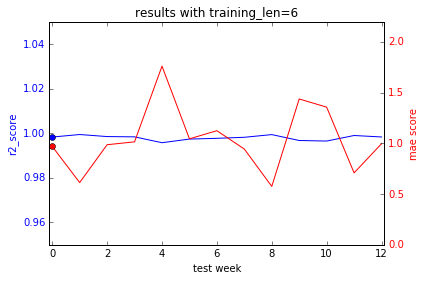

r2_score: mean= 0.997953763986 variance= 1.14333232014e-06
mae_score: mean= 1.04107069762 variance= 0.100961792252


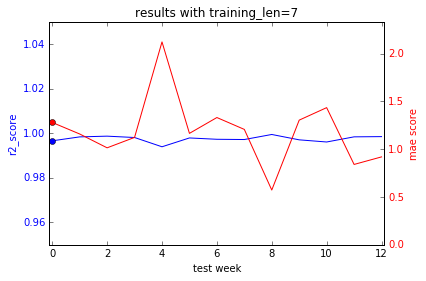

r2_score: mean= 0.997481850128 variance= 1.85277659214e-06
mae_score: mean= 1.19114613181 variance= 0.121982635728


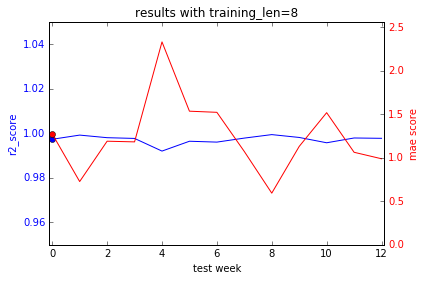

r2_score: mean= 0.99715522262 variance= 3.27488548806e-06
mae_score: mean= 1.23998671525 variance= 0.173529737205


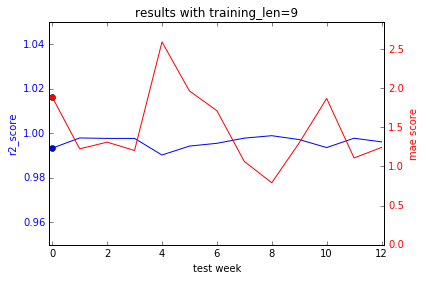

r2_score: mean= 0.995975415477 variance= 5.76973840581e-06
mae_score: mean= 1.48200981286 variance= 0.22134177338


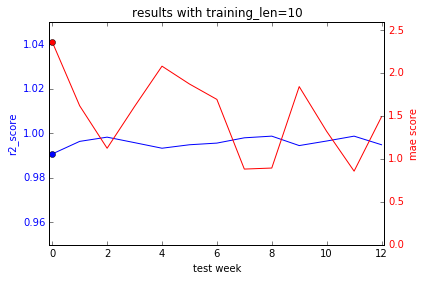

r2_score: mean= 0.995828230003 variance= 4.92217626753e-06
mae_score: mean= 1.51007677609 variance= 0.209938740518


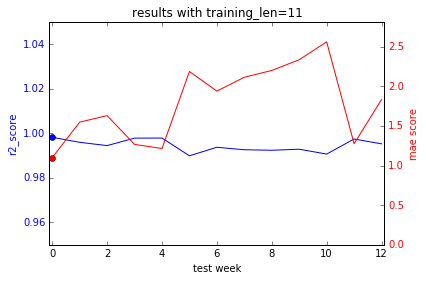

r2_score: mean= 0.994520917305 variance= 7.24129427869e-06
mae_score: mean= 1.78424593989 variance= 0.213259808552


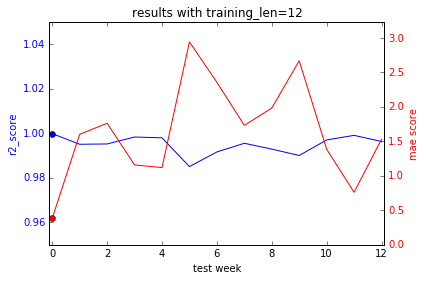

r2_score: mean= 0.99489000457 variance= 1.5753065199e-05
mae_score: mean= 1.64526895291 variance= 0.487371842069


In [16]:
training_lens = range(1,13)
models = {}


for training_len in training_lens:
    X_train_short = X[:, :training_len]
    y_train_short = X[:, training_len]

    for offset in range(1, 12-training_len):
        X_train_short = np.vstack( (X_train_short, X[:, offset:training_len+offset]) )
        y_train_short = np.concatenate( (y_train_short, X[:, training_len+offset]) )

    regr_x = LinearRegression()
    regr_x.fit(X_train_short, y_train_short)
    models[training_len] = regr_x

    plot_vals = []

    for offset in range(0, X.shape[1]-X_train.shape[1]):
        X_test = X[:, 12-training_len+offset:12+offset]
        y_test = X[:, 12+offset]

        r2 = r2_score(y_test, regr_x.predict(X_test))
        mae = mean_absolute_error(y_test, regr_x.predict(X_test))

        plot_vals.append( (offset, r2, mae) )

    fig, ax1 = plt.subplots()
    ax1.plot([x[0] for x in plot_vals], [x[1] for x in plot_vals], 'b-')
    ax1.plot(plot_vals[0][0], plot_vals[0][1], 'bo')

    ax1.set_xlabel('test week')
    ax1.set_ylabel('r2_score', color='b')
    for tl in ax1.get_yticklabels():
        tl.set_color('b')
    ax1.set_ylim([0.95, 1.05])


    ax2 = ax1.twinx()
    ax2.plot([x[0] for x in plot_vals], [x[2] for x in plot_vals], 'r-')
    ax2.plot(plot_vals[0][0], plot_vals[0][2], 'ro')
    ax2.set_ylabel('mae score', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    ax2.set_ylim([0, max([2.2, 1.1*np.max([x[2] for x in plot_vals])])])

    plt.xlim([-.1, 12.1])
    
    plt.title("results with training_len={}".format(training_len))

    plt.show()

    print("r2_score: mean=", np.mean([x[1] for x in plot_vals]), "variance=", np.var([x[1] for x in plot_vals]))
    print("mae_score: mean=", np.mean([x[2] for x in plot_vals]), "variance=", np.var([x[2] for x in plot_vals]))